In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = ''

In [2]:
from Scripts.Data.Thchs30Data import Thchs30Data
from Scripts.Models.DataParsers.AcousticParser import AcousticDataParser, AcousticLabelParser
import matplotlib.pyplot as plt

In [3]:

cache_dir = 'debug/cache'

'''一个拼音最短大概0.1s,
若hop_s为0.016s,那么6.25个hop覆盖0.1s'''
"""
audio_filepath:一个音频文件路径
fft_s:一个短时傅里叶变换的窗长，单位为秒
hop_s：窗之间间隔长，单位为秒

返回：行数为 duration_s(音频长度，秒)//hop_s, 列数为 fft_s * target_sr//2 的二维数组；
    纵向代表时间(每行跨越hop_s秒)，横向代表频率（物理范围：0至(target_sr//2) Hz,每列跨越fft_s Hz），元素大小代表能量（单位：db）
"""
stft_fea = {
    'name':'stft',
    'kwargs':{
        'fft_s': 0.128,  # fft_s:一个短时傅里叶变换的窗长，单位为秒
        'hop_s': 0.016,  # hop_s：窗之间间隔长，单位为秒
        'target_sr': 8000, # 统一音频采样率目标，音频将自动重采样为该采样率
    }
}

"""
audio_filepath:一个音频文件路径
fft_s:一个短时傅里叶变换的窗长，单位为秒
hop_s：窗之间间隔长，单位为秒

返回：行数为 duration_s(音频长度,秒)//hop_s, 列数为 n_mels 的二维数组，纵向代表时间(一行跨越 hop_s 秒)，横向代表频率（物理范围：0-(target_sr//2) Hz,一列跨越fft_s Hz），大小代表能量（单位：db）
"""
mel_fea = {
    'name':'mel',
    'kwargs':{
        'fft_s': 0.128,  # fft_s:一个短时傅里叶变换的窗长，单位为秒
        'hop_s': 0.016,  # hop_s：窗之间间隔长，单位为秒
        'target_sr': 8000, # 统一音频采样率目标，音频将自动重采样为该采样率
        'n_mels': 128 # mel 特征维度
    }
}

tf_mel_fea = {
    'name':'tf_mel',
    'kwargs':{
        'fft_s': 0.128,  # fft_s:一个短时傅里叶变换的窗长，单位为秒
        'hop_s': 0.016,  # hop_s：窗之间间隔长，单位为秒
        'n_mels': 128 # mel 特征维度
    }
}

In [4]:
example_fp = "A11_0.wav"
dataObj = Thchs30Data(filepath = example_fp)

In [5]:
stft_dataparser = AcousticDataParser(
    feature=stft_fea, cache_dir=cache_dir, open_cache = False)
mel_dataparser = AcousticDataParser(
    feature=mel_fea, cache_dir=cache_dir, open_cache = False)
tf_mel_dataparser = AcousticDataParser(
    feature=tf_mel_fea, cache_dir=cache_dir, open_cache = False)

使用样例数据: /home/A/Work/Speech/DeepASR/Scripts/Models/DataParsers/A11_0.wav
使用特征: stft 特征参数: {'fft_s': 0.128, 'hop_s': 0.016, 'target_sr': 8000} 特征长度: 513
请确认以上信息,按任意键继续...
使用样例数据: /home/A/Work/Speech/DeepASR/Scripts/Models/DataParsers/A11_0.wav
使用特征: mel 特征参数: {'fft_s': 0.128, 'hop_s': 0.016, 'target_sr': 8000, 'n_mels': 128} 特征长度: 128
请确认以上信息,按任意键继续...


W0908 18:20:11.239865 139849639315200 deprecation_wrapper.py:119] From /home/A/Work/Speech/DeepASR/Scripts/Models/DataParsers/Features/mel.py:30: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0908 18:20:11.373060 139849639315200 deprecation_wrapper.py:119] From /home/A/Work/Speech/DeepASR/Scripts/Models/DataParsers/Features/mel.py:31: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



使用样例数据: /home/A/Work/Speech/DeepASR/Scripts/Models/DataParsers/A11_0.wav


W0908 18:20:11.766595 139849639315200 deprecation_wrapper.py:119] From /home/A/Work/Speech/DeepASR/Scripts/Models/DataParsers/Features/mel.py:75: The name tf.log is deprecated. Please use tf.math.log instead.



ValueError: Cannot feed value of shape (1, 124800) for Tensor 'Placeholder_1:0', which has shape '(?, 1)'

In [ ]:
data = stft_dataparser(dataObj)
# label = labelparser(data_obj)
plt.matshow(data)

In [ ]:
data = mel_dataparser(dataObj)
# label = labelparser(data_obj)
plt.matshow(data)

In [ ]:
data = tf_mel_dataparser(dataObj)
plt.matshow(data)

In [6]:
import tensorflow as tf
from tensorflow.python.ops import io_ops
from tensorflow.contrib.framework.python.ops import audio_ops as contrib_audio
def load_wav_file(filename):
  """Loads an audio file and returns a float PCM-encoded array of samples."""
  with tf.Session(graph=tf.Graph()) as sess:
    wav_filename_placeholder = tf.placeholder(tf.string, [])
    wav_loader = io_ops.read_file(wav_filename_placeholder)
    wav_decoder = contrib_audio.decode_wav(wav_loader, desired_channels=1)
    return sess.run(
        wav_decoder, feed_dict={
            wav_filename_placeholder: filename
        })

In [7]:
DecodeWav = load_wav_file(example_fp)

In [8]:
DecodeWav.audio.shape

(124800, 1)

In [ ]:
import numpy as np

In [9]:
import tensorflow as tf
from tensorflow.python.ops import io_ops
from tensorflow.contrib.framework.python.ops import audio_ops as contrib_audio
def _parse_one_audio_tf_melspec(au_data_obj,fft_s, hop_s, n_mels ):
    
    with tf.Session(graph=tf.Graph()) as sess:
        wav_filename_placeholder = tf.placeholder(tf.string, [])
        wav_loader = io_ops.read_file(wav_filename_placeholder)
        wav_decoder = contrib_audio.decode_wav(wav_loader, desired_channels=1, desired_samples=-1)
        DecodeWav = sess.run(wav_decoder,feed_dict={
                wav_filename_placeholder: au_data_obj.filepath
            })
        sr = DecodeWav.sample_rate

        
        audio_placeholder  = tf.placeholder(tf.float32,shape=(None,1))

        log_mel_spectrograms_ = raw_audio2log_mel_spec_op(audio_placeholder,sr,fft_s, hop_s, n_mels)
        res = sess.run(
            log_mel_spectrograms_,
            feed_dict={
                audio_placeholder: DecodeWav.audio,
            })
    return res


def raw_audio2log_mel_spec_op(audio_placeholder,sr,fft_s, hop_s, n_mels):

    n_fft = int(round(fft_s * sr))
    hop_length =  int(round(hop_s * sr))
    stfts_ = tf.contrib.signal.stft(
        tf.transpose(audio_placeholder),
        frame_length=n_fft,
        frame_step=hop_length,
        fft_length=None)
    spectrogram_ = tf.abs(stfts_)
#         lower_edge_hertz = 125.0
#         upper_edge_hertz = 3800.0
    linear_to_mel_weight_matrix = \
        tf.contrib.signal.linear_to_mel_weight_matrix(
            num_mel_bins=n_mels,
            num_spectrogram_bins=spectrogram_.shape[-1].value, 
            sample_rate=sr,
#                 lower_edge_hertz=lower_edge_hertz,
#                 upper_edge_hertz=upper_edge_hertz
        )
    mel_spectrograms_ = tf.tensordot(spectrogram_,
                                    linear_to_mel_weight_matrix,1)
    mel_spectrograms_.set_shape(spectrogram_.shape[:-1].concatenate(
            linear_to_mel_weight_matrix.shape[-1:]))
    log_mel_spectrograms_ = tf.log(mel_spectrograms_ + 1e-6)
    return log_mel_spectrograms_

In [10]:
res = _parse_one_audio_tf_melspec(dataObj,**tf_mel_fea['kwargs'])

In [11]:
res.shape

(1, 480, 128)

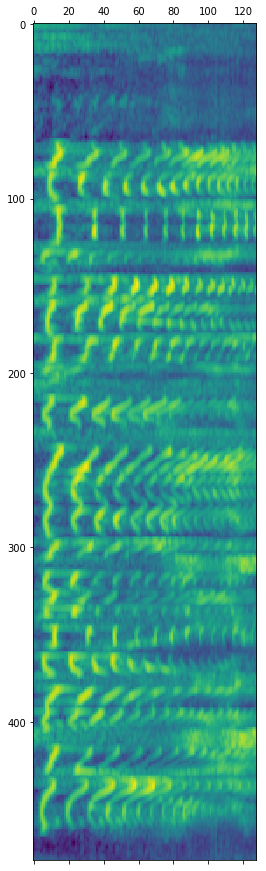

In [13]:
plt.matshow(res[0])

In [ ]:
res